In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/stevani10/GenerasiGigih2.0/main/superstore_orders.csv'
data =  pd.read_csv(url, delimiter=";")

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,08/11/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/06/20,16/06/20,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/19,18/10/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/19,18/10/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [ ]:
data['date'] = pd.to_datetime(data['date'])

data['Year']=data['date'].dt.year
data['Month']=data['date'].dt.month
data['Day']=data['date'].dt.day

In [ ]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Date'] = pd.to_datetime(data['Order Date'])

print(type(data['Ship Date'].iloc[0]))
print(type(data['Order Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
data['Order Date']=pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date']=pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

In [ ]:
data['Year']=data['Order Date'].dt.year
data['Month']=data['Order Date'].dt.month
data['Day']=data['Order Date'].dt.day

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
0,1,CA-2020-152156,2020-08-11,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2020,8,11
1,2,CA-2020-152156,2020-08-11,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2020,8,11
2,3,CA-2020-138688,2020-12-06,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2020,12,6
3,4,US-2019-108966,2019-11-10,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2019,11,10
4,5,US-2019-108966,2019-11-10,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2019,11,10


In [ ]:
#How much sales do we have on 2018?
data.groupby('Year')['Sales'].sum()

Year
2018    484247.4981
2019    470532.5090
2020    609205.5980
2021    733215.2552
Name: Sales, dtype: float64

In [ ]:
#Which year has the highest profit?
data.groupby('Year')['Profit'].sum()

Year
2018    49543.9741
2019    61618.6037
2020    81795.1743
2021    93439.2696
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Total Profit by Order Time')

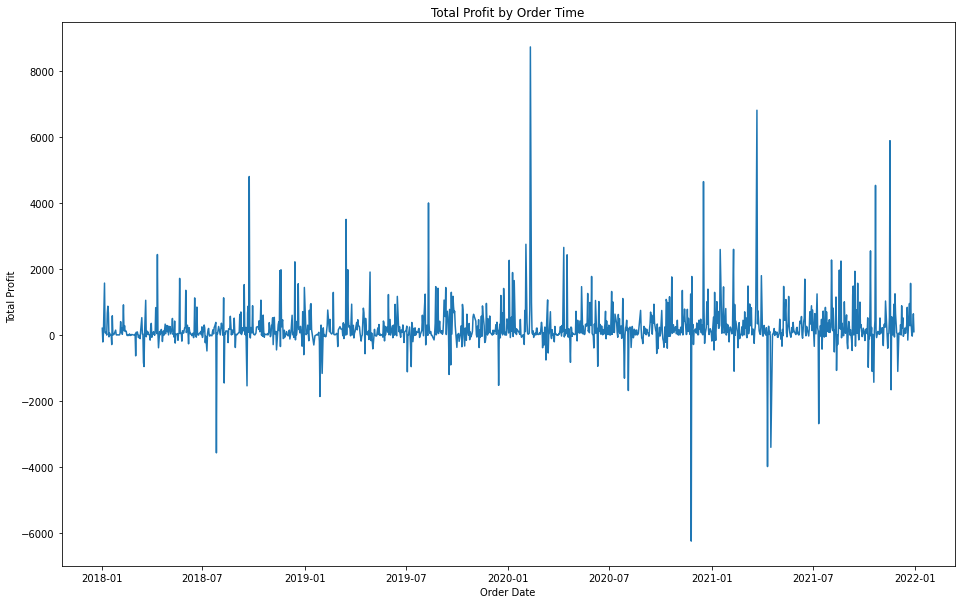

In [ ]:
dfdate = data[['Order Date', 'Profit']].sort_values(by='Order Date')
dfdate_sum = dfdate.groupby('Order Date').agg({'Profit':'sum'})
plt.figure(figsize=(16,10))
plt.plot(dfdate_sum.index, dfdate_sum['Profit'],label='Profit')
plt.xlabel('Order Date')
plt.ylabel('Total Profit ')
plt.title('Total Profit by Order Time')

In [ ]:
#Which sub category has minus profit?
dfsubcat = data.groupby(['Sub-Category'])

Text(0.5, 0, 'Profit')

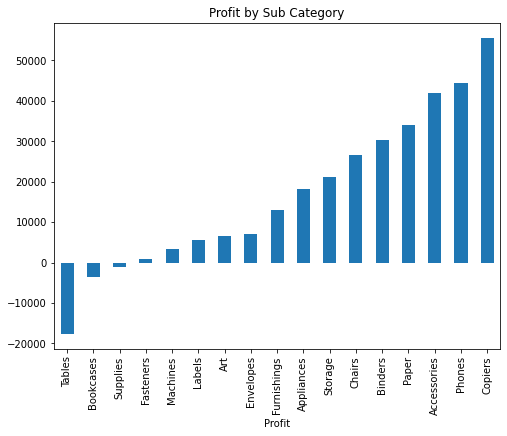

In [ ]:
plt.figure(figsize=(8,6))
dfsubcat['Profit'].sum().sort_values(ascending=True).plot(kind='bar')
plt.title("Profit by Sub Category")
plt.xlabel("Profit")

In [ ]:
#What is the result of matrix multiplication a (left) and b (right)?
import numpy as np
A = np.matrix('1 2 3; 4 5 6; 7 8 9')
A

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
B = np.matrix('2 3 4; 5 6 7; 8 9 10')
B

matrix([[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]])

In [ ]:
A @ B

matrix([[ 36,  42,  48],
        [ 81,  96, 111],
        [126, 150, 174]])

In [ ]:
#Let's say we have loop function to calculate sum of all numbers from 1 to a given number. 
#What is the result of sum if we input 100? 
def sum(n): 
   total = 0 
   for i in range(n+1): 
      total += i 
   return total 
sum(100) 

5050

In [ ]:
%%shell
jupyter nbconvert --to html ///content/KMDA1_KM_G2DA1289.ipynb

[NbConvertApp] Converting notebook ///content/KMDA1_KM_G2DA1289.ipynb to html
[NbConvertApp] Writing 400985 bytes to ///content/KMDA1_KM_G2DA1289.html
